In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [31]:
df = pd.read_csv("dataset.csv")
df.head(10)

,applicant_name,age,gender,marital_status,occupation,job_position,job_specific_code,job_specific,education_level,tipe_pinjaman,...,debt_to_income_ratio,monthly_income,additional_income,job_tenure_years,dependents,existing_loans_count,existing_loans_total,payment_history_score,debt_to_income_ratio_num,approval_status
0,Ami Rahmawati,29,P,Duda,Pilot; airline,Supervisor,10612,Industri Penggilingan Aneka Kacang (termasuk L...,D4,Personal,...,baik,24565607,1291968,5,0,3,5526102,60,0.02,0
1,Hafshah Prabowo,27,L,Belum Kawin,Archaeologist,Karyawan (Employee),1193,Pertanian Tanaman Bunga,D4,Personal,...,baik,8620895,2014847,3,3,0,0,94,0.00,1
2,Dt. Darijan Usamah; M.Ak,23,P,Duda,Insurance account manager,Staff,72206,Penelitian Dan Pengembangan Sejarah,S3,Perusahaan,...,baik,18525802,2078667,0,1,3,4428924,95,0.02,1
3,Cornelia Halimah,30,L,Cerai Hidup,Trade union research officer,Staff,32402,Industri Mainan Anak-anak,S1,Perusahaan,...,baik,5069381,549782,4,1,0,0,61,0.00,1
4,Leo Irawan,43,L,Kawin,Loss adjuster; chartered,Supervisor,55191,Penginapan Remaja (youth Hostel),SMA/SMK,Personal,...,baik,8137119,521510,7,1,2,10672286,98,0.11,1
5,dr. Hendri Putra,21,P,Cerai Hidup,Advertising account planner,Staff,46333,Perdagangan Besar Minuman Beralkohol,D3,Perusahaan,...,baik,4420650,265843,0,1,1,3675347,82,0.07,1
6,Argono Waskita,51,P,Cerai Hidup,Technical brewer,Supervisor,47191,Perdagangan Eceran Berbagai Macam Barang Yang ...,D3,Personal,...,baik,9606510,816556,17,0,0,0,73,0.00,1
7,Darmaji Sitompul; S.H.,19,L,Belum Kawin,Podiatrist,Karyawan (Employee),55112,Hotel Bintang Empat,S3,Personal,...,baik,4588059,420878,0,3,0,0,68,0.00,1
8,Ika Utama,41,L,Duda,Field trials officer,Supervisor,47221,Perdagangan Eceran Minuman Beralkohol,SMA/SMK,Perusahaan,...,baik,10151005,566044,7,1,0,0,96,0.00,1
9,Puput Hutasoit,47,P,Cerai Mati,Air traffic controller,Direktur,59111,Aktivitas Produksi Film; Video Dan Program Tel...,SMA/SMK,Perusahaan,...,baik,7672170,1027118,17,0,1,1172429,95,0.01,1


In [32]:
cols_to_drop = [
    "applicant_name",
    "address",
    "company_address",
    "job_tenure",
    "debt_to_income_ratio"
]

for c in cols_to_drop:
  if c in df.columns:
    df  = df.drop(columns=c)

In [33]:
df

,age,gender,marital_status,occupation,job_position,job_specific_code,job_specific,education_level,tipe_pinjaman,income,...,jangka_waktu_kredit,monthly_income,additional_income,job_tenure_years,dependents,existing_loans_count,existing_loans_total,payment_history_score,debt_to_income_ratio_num,approval_status
0,29,P,Duda,Pilot; airline,Supervisor,10612,Industri Penggilingan Aneka Kacang (termasuk L...,D4,Personal,39000000,...,3,24565607,1291968,5,0,3,5526102,60,0.02,0
1,27,L,Belum Kawin,Archaeologist,Karyawan (Employee),1193,Pertanian Tanaman Bunga,D4,Personal,14000000,...,3,8620895,2014847,3,3,0,0,94,0.00,1
2,23,P,Duda,Insurance account manager,Staff,72206,Penelitian Dan Pengembangan Sejarah,S3,Perusahaan,28000000,...,12,18525802,2078667,0,1,3,4428924,95,0.02,1
3,30,L,Cerai Hidup,Trade union research officer,Staff,32402,Industri Mainan Anak-anak,S1,Perusahaan,39000000,...,12,5069381,549782,4,1,0,0,61,0.00,1
4,43,L,Kawin,Loss adjuster; chartered,Supervisor,55191,Penginapan Remaja (youth Hostel),SMA/SMK,Personal,36000000,...,12,8137119,521510,7,1,2,10672286,98,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,19,P,Cerai Mati,Commercial art gallery manager,Kepala Divisi,10762,Industri Pengolahan Herbal (herb Infusion),S3,Personal,37000000,...,12,16357347,3015640,0,1,1,3357390,78,0.02,1
97,28,L,Cerai Mati,Newspaper journalist,Karyawan (Employee),84126,Administrasi Pelayanan Pemerintah Bidang Kebud...,S2,Perusahaan,15000000,...,6,14815355,2968147,4,0,1,4344246,79,0.02,1
98,19,L,Duda,Theatre stage manager,Karyawan (Employee),61911,Jasa Panggilan Premium (premium Call),S1,Personal,6000000,...,3,17523552,5028361,0,1,2,11799730,77,0.06,1
99,29,P,Cerai Mati,Records manager,Supervisor,49421,Angkutan Taksi,S1,Personal,46000000,...,3,19850898,4252791,4,1,0,0,94,0.00,1


In [35]:
#membuat education level dan job position menjadi skor

education_map = {
    "SMA/SMK": 1,
    "D3": 2,
    "S1": 3,
    "S2": 4,
    "S3": 5
}

df["education_score"] = df["education_level"].map(education_map).fillna(0)

job_position_map = {
    "Staff": 1,
    "Karyawan (empployee)": 1,
    "Supervisor": 2,
    "Kepala Divisi": 3,
    "Manager": 3,
    "Wakil Direktur": 4,
    "Direktur": 4,
    "Wakil Direktur Utama": 5,
    "Direktur Utama": 5
}

df["job_position_score"] = df["job_position"].map(job_position_map).fillna(0)


#memastikan untu numerik

numeric_to_convert = [
    "age", "income", "expenditure", "job_tenure_years",
    "total_pinjaman", "asset_total", "kapasitas_usaha",
    "jangka_waktu_kredit", "monthly_income", "additional_income",
    "dependents", "existing_loans_count", "existing_loans_total",
    "payment_history_score", "debt_to_income_ratio_num",
    "education_score", "job_position_score"
]

for col in numeric_to_convert:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [36]:
#capacity features

# net income: pendapatan bersih per bulan
df["net_income"] = (df["monthly_income"] + df["additional_income"]) - df["expenditure"]
# expense ratio: proporsi pengeluaran terhadap income
df["expense_ratio"] = df["expenditure"] / (df["monthly_income"] + df["additional_income"] + 1)
#total kewajiban pinjamann (kredit sekarang + existing loans lain)
df["total_obligation"] = df["total_pinjaman"] + df["existing_loans_total"]
#stability score: stabilitas kerja relatif erhadap jumlah tanggungan
df["stability_score"] = df["job_tenure_years"] / (df["dependents"] + 1)

#CAPACITY INDEX: kombinasi sederhana dari kemampuan membayar + riwayat
df["capacity_index"] = (
    df["net_income"] * 0.5
    + (1 - df["expense_ratio"]) * 0.2
    + df["payment_history_score"] * 0.3
)

#Earning Power index: potensi pendapatan berdasar pendidikan, jabatan dan masa kerja
df["earning_power_index"] = (
    df["education_score"] * 0.4
    + df["job_position_score"] * 0.4
    + (df["job_tenure_years"] / 5.0) * 0.2
)


In [37]:
#memisahkan numerik dan kategori

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
#pastikan tidak measukkan target ke dalam numeric_cols:
if "approval_status" in numeric_cols:
  numeric_cols.remove("approval_status")

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

#imputasi kategori dengan median
for col in numeric_cols:
  df[col] = df[col].fillna(df[col].median())

#imputasi kategori dengan modus
for col in categorical_cols:
  mode_val = df[col].mode()
  if len(mode_val) > 0:
    df[col] = df[col].fillna(mode_val[0])


In [42]:
#encoding variabel kategori dengan (one-hot)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#scaling fitur numerik
#setelah dilakukan get.dummies, menentukan ulang numeric_cols (tanpa target)

numeric_cols_encoded = df_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "approval_status" in numeric_cols_encoded:
  numeric_cols_encoded.remove("approval_status")

scaler = RobustScaler()
df_encoded[numeric_cols_encoded] = scaler.fit_transform(df_encoded[numeric_cols_encoded])


In [43]:
df_encoded.to_csv("dataset_preprocessed.csv", index=False)

In [44]:
X = df_encoded.drop(columns=["approval_status"])
y = df_encoded["approval_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape X_train: ", X_train.shape)
print("Shape X_test: ", X_test.shape)

Shape X_train:  (80, 356)
Shape X_test:  (21, 356)


In [45]:
!pip install xgboost

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [51]:
# Model XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Training
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [56]:
from sklearn.metrics import accuracy_score

# akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.0f}%".format(accuracy * 100))

Accuracy: 100%


In [57]:
# Prediksi kelas
y_pred = xgb_model.predict(X_test)

# Prediksi probabilitas (untuk AUC)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", auc)

Confusion Matrix:
[[ 4  0]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        17

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

AUC-ROC: 1.0


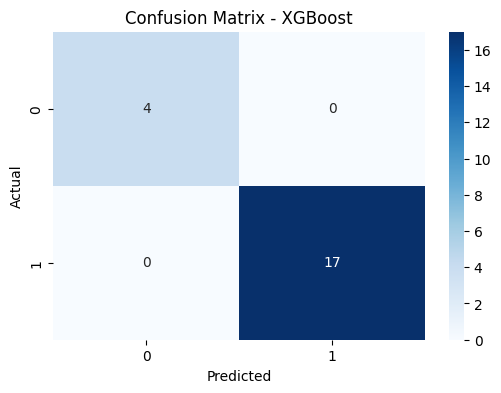

In [58]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

existing_loans_count          0.307843
payment_history_score         0.176034
monthly_income                0.132548
debt_to_income_ratio_num      0.130673
existing_loans_total          0.037337
education_score               0.035898
income                        0.028035
expenditure                   0.018444
work_schedule                 0.018217
total_obligation              0.015965
tipe_pinjaman_Perusahaan      0.015084
health_situation_Sakit        0.009854
total_pinjaman                0.009203
language_profeciency          0.008829
capacity_index                0.008211
job_specific_code             0.007576
gender_P                      0.006969
earning_power_index           0.006760
social_network_tidak aktif    0.006321
net_income                    0.006290
dtype: float32


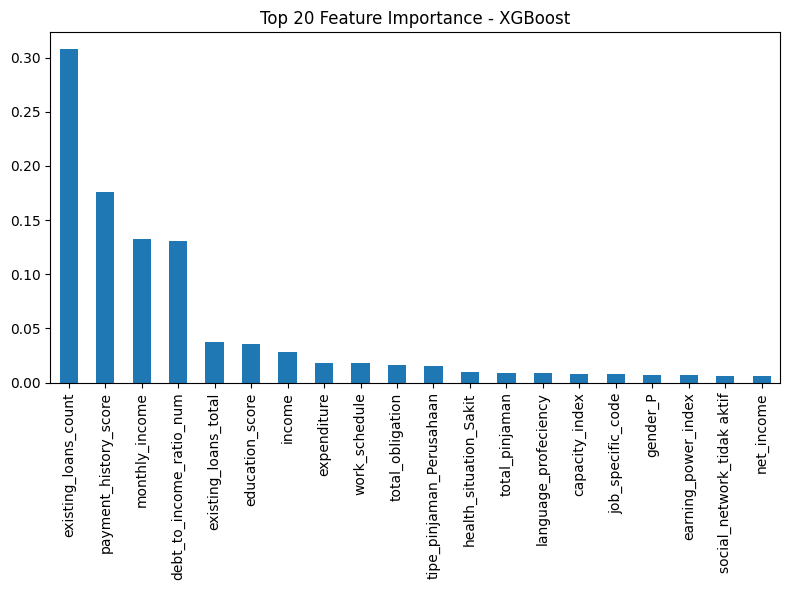

In [59]:
feature_importance = pd.Series(
    xgb_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance.head(20))

plt.figure(figsize=(8,6))
feature_importance.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

In [61]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring="accuracy")
print(cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

[0.95238095 1.         1.         1.         0.95      ]
Mean CV Accuracy: 0.9804761904761905
